In [12]:
import random
import torch
from d2l import torch as d2l

In [4]:
def synthetic_data(w, b, num_examples):
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape(-1, 1)


true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

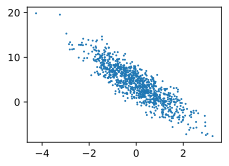

In [13]:
d2l.set_figsize()
d2l.plt.scatter(features[:, 1].detach().numpy(),
                labels.detach().numpy(), 1)

In [15]:
def data_iter(batch_size, features, labels):
    num_examples = len(labels)
    indices = list(range(num_examples))
    # 随机读取数据
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i:min(i + batch_size, num_examples)])
        yield features[batch_indices, :], labels[batch_indices]

In [30]:
batch_size = 10
for X, y in data_iter(10, features, labels):
    print(X, '\n', y)
    break

tensor([[ 0.6230, -0.1303],
        [-0.8580, -1.5456],
        [ 0.1097, -1.1359],
        [-0.6126,  1.4239],
        [-0.3735,  0.7436],
        [ 2.0878,  1.4629],
        [ 0.8853, -0.0023],
        [ 1.1153,  1.0726],
        [-1.5037,  0.3125],
        [-0.5898,  1.6350]]) 
 tensor([[ 5.8858],
        [ 7.7569],
        [ 8.2968],
        [-1.8826],
        [ 0.9337],
        [ 3.3889],
        [ 5.9598],
        [ 2.7964],
        [ 0.1327],
        [-2.5350]])


In [32]:
w = torch.normal(0, 0.01, (2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [33]:
def lin_reg(W, x, b):
    """
    线性回归模型
    """
    return torch.matmul(x, W) + b


def squared_loss(y_hat, y):
    """
    均方误差
    """
    return (y.reshape(y_hat.shape) - y_hat) ** 2 / 2


def sgd(params, lr, batch_size):
    """
    小批量随机梯度下降
    '"""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

训练过程

In [37]:
lr = 0.03
num_epochs = 3
net = lin_reg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(w, X, b), y)
        l.sum().backward()
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        print(f'Epoch:{epoch} Loss:{float(loss(net(w, features, b), labels).mean()):f}')

Epoch:0 Loss:0.000045
Epoch:1 Loss:0.000046
Epoch:2 Loss:0.000045


In [41]:
print(f'w的误差：{true_w - w.reshape(true_w.shape)}')
print(f'b的误差：{true_b - b}')

w的误差：tensor([-6.8808e-04, -5.3644e-05], grad_fn=<SubBackward0>)
b的误差：tensor([-0.0001], grad_fn=<RsubBackward1>)
